#
#	JSON Data flattening to pandas
#	AUTHOR: 乔昂 - jueta
#	DATE: 28/11/2022


In [1]:

import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
from sklearn.utils import column_or_1d
import numpy as np
from scipy.signal import butter, lfilter

## Importing data

In [2]:
# warnings.filterwarnings('ignore')
sampling_frequency = 1e5


with open("joaoData/" + "data2" + ".json", 'r') as data_file:    
    data = json.loads(data_file.read())  

data_measurements = pd.json_normalize(data, record_path=['measurements'])
data_processing = pd.json_normalize(data, record_path=['processing'])
df = pd.concat([data_measurements, data_processing], axis=1)
# df.dropna()


## Adding colormap column

In [3]:
colormap = []
for electro_class in df['spray mode.Sjaak']:
    if electro_class == 'intermittent' or electro_class == 'intermittent 1':
        colormap.append('blue')
    elif electro_class == 'cone jet ':
        colormap.append('red')
    elif electro_class == 'dripping' or electro_class == 'dripping 1 ':
        colormap.append('green')
    else:
        colormap.append('black')

# Monica spark classification
sampleIndex = 0
for monica_class in df['spray mode.Monica']:
    if monica_class == 'streamer onset':
        colormap[sampleIndex] = 'purple'
    sampleIndex+=1



df.insert(1, 'colormap', colormap)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               114 non-null    object 
 1   colormap           114 non-null    object 
 2   data [nA]          114 non-null    object 
 3   flow rate [m3/s]   114 non-null    float64
 4   voltage            114 non-null    object 
 5   current PS         114 non-null    object 
 6   temperature        114 non-null    object 
 7   humidity           114 non-null    object 
 8   date and time      114 non-null    object 
 9   mean               113 non-null    float64
 10  variance           113 non-null    float64
 11  deviation          113 non-null    float64
 12  median             113 non-null    float64
 13  rms                113 non-null    float64
 14  fourier peaks      113 non-null    object 
 15  freq               113 non-null    object 
 16  spray mode.Sjaak   113 non

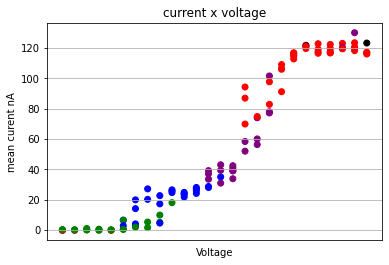

In [21]:
plt.title('current x voltage')
plt.ylabel('mean curent nA')
plt.xlabel('Voltage')
plt.xticks(np.arange(3000, 11000, step=100))
plt.scatter(df['voltage'], df['mean'], color=df['colormap'])
plt.grid()

plt.show()

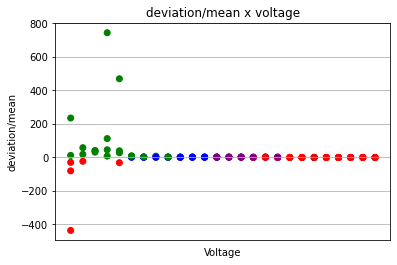

In [22]:
plt.title('deviation/mean x voltage')
plt.ylabel('deviation/mean')
plt.xlabel('Voltage')
plt.xticks(np.arange(3000, 11000, step=100))
plt.scatter(df['voltage'], (df['deviation']/df['mean']), color=df['colormap'])
plt.grid()

plt.show()

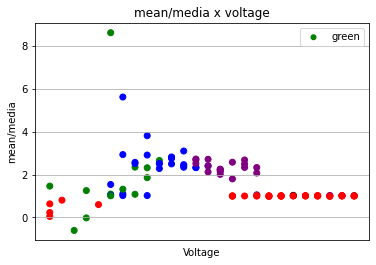

In [41]:
plt.title('mean/media x voltage')
plt.ylabel('mean/media')
plt.xlabel('Voltage')
plt.xticks(np.arange(3000, 11000, step=100))
plt.scatter(df['voltage'], (df['mean']/df['median']), color=df['colormap'])
plt.legend(df['colormap'])
plt.grid()

plt.show()